In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trad-new-df/fe_TRAD_manual_2.csv


In [2]:
df_trad = pd.read_csv('/kaggle/input/trad-new-df/fe_TRAD_manual_2.csv')

In [3]:
c = df_trad['grade']
X = df_trad.drop('grade', axis=1)
X = X.drop('text', axis=1)
X.head()


,count_syllables,flesch_kincaid_grade_score,num_of_words,avg_word_length,flesch_reading_score,Average_Syyllabels_count
0,7,13.113333,3,6.333333,6.390,2.333333
1,7,2.880000,5,4.600000,83.320,1.400000
2,4,1.313333,3,3.666667,90.990,1.333333
3,4,8.790000,2,5.500000,35.605,2.000000
4,5,8.790000,2,4.500000,35.605,2.000000


In [4]:
from sklearn.model_selection import train_test_split

X = df_trad[['count_syllables', 'flesch_kincaid_grade_score', 'num_of_words', 'avg_word_length', 'flesch_reading_score', 'Average_Syyllabels_count']]
y = df_trad[['grade']]


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

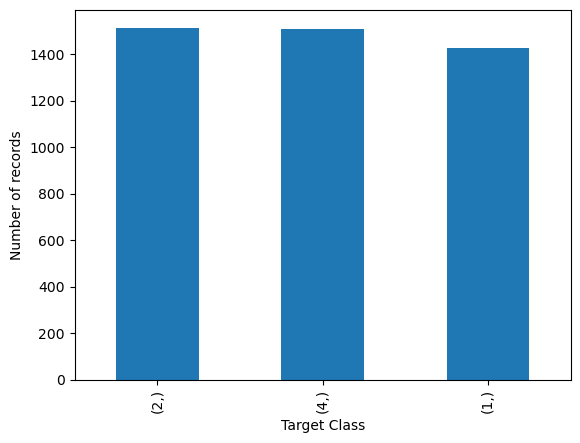

In [7]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [8]:
from sklearn import svm, datasets
model = svm.SVC().fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


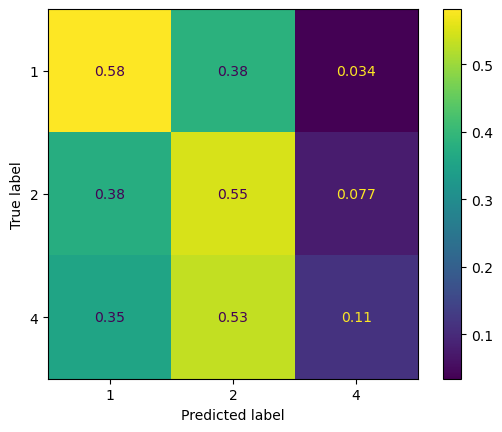

In [9]:
# model_svm.fit(X_train, y_train)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true')
plt.show()

In [10]:
model_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred, digits=3))

              precision    recall  f1-score   support

           1      0.422     0.582     0.489       349
           2      0.379     0.548     0.448       378
           4      0.518     0.114     0.187       385

    accuracy                          0.408      1112
   macro avg      0.440     0.415     0.375      1112
weighted avg      0.441     0.408     0.371      1112



In [11]:
from sklearn.model_selection import GridSearchCV
model_svm = svm.SVC()

In [12]:
param_grid = {
#     'C': [0.1, 1, 10, 100, 1000],
    'C' : [1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#     'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'kernel' : ['rbf'],
    'decision_function_shape':['ovo', 'ovr'],
}

In [13]:
grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1000], 'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [14]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'C': 1000, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  0.5737424807588417


In [15]:
final_model = svm.SVC(**best_params)


final_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, decision_function_shape='ovo', gamma=0.1)

In [16]:
accuracy = final_model.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.5863309352517986


In [17]:
grid_search_predictions = grid_search.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, grid_search_predictions))


print("Classification Report:")
print(classification_report(y_test, grid_search_predictions, digits=3))

Confusion Matrix:
[[260  52  37]
 [ 81 222  75]
 [ 95 120 170]]
Classification Report:
              precision    recall  f1-score   support

           1      0.596     0.745     0.662       349
           2      0.563     0.587     0.575       378
           4      0.603     0.442     0.510       385

    accuracy                          0.586      1112
   macro avg      0.588     0.591     0.582      1112
weighted avg      0.587     0.586     0.580      1112



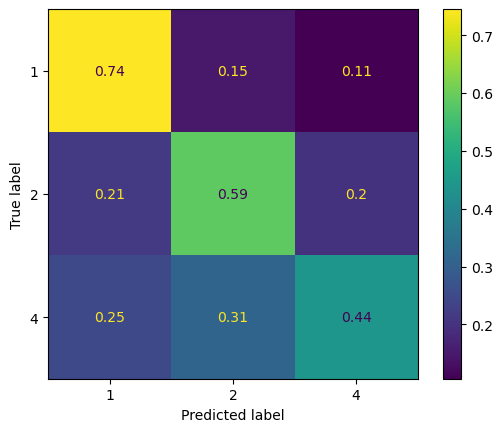

In [18]:
cm_display = ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, normalize='true')

In [19]:
# model_2 = svm.SVC(gamma = 1, C = 1000, decision_function_shape='ovo', kernel='linear').fit(X_train, y_train)

In [20]:
# model_pred_2 = model_2.predict(X_test)

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, model_pred_2))


# print("Classification Report:")
# print(classification_report(y_test, model_pred_2, digits=3))

In [21]:
# cm_display = ConfusionMatrixDisplay.from_estimator(model_2, X_test, y_test, normalize='true')